<a href="https://colab.research.google.com/github/dinalarcode/PBA-GASAL-25-068/blob/main/Week2_APPSREV_Gojek_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google_play_scraper -q
!pip install textblob -q
!pip install seaborn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  try:
    df_gjkrev = pd.read_csv(io.BytesIO(uploaded[fn]))
    print("Successfully loaded CSV into df_jknrev")
  except pd.errors.ParserError:
      print(f"Error: Could not parse {fn} as a CSV. Please upload a valid CSV file.")
      df_gjkrev = pd.DataFrame() # Create an empty DataFrame if parsing fails
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_gjkrev = pd.DataFrame()


Saving df_jknrev to df_jknrev (1)
User uploaded file "df_jknrev (1)" with length 12818672 bytes
Successfully loaded CSV into df_jknrev


In [ ]:
df_jknrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,dd651382-23c8-4f1f-bd7b-28cfe6690f49,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Udah install sejak pertama kali muncul. Waktu ...,4,0,4.12.0,2025-03-05 04:59:40,NaN,NaN,4.12.0
1,cb170ea8-abf1-4a3c-b9d9-53cc495f46f1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa susah sekali utk login. saya udah bayar...,5,0,4.12.0,2025-03-05 04:56:43,NaN,NaN,4.12.0
2,d1914c18-39f1-4578-aa7c-9105b41b056c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,4.12.0,2025-03-05 03:59:45,NaN,NaN,4.12.0
3,c3522a8c-da79-4b51-a7ce-70cc822bb671,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"The best apps, sangat membantu untuk ubah fask...",5,0,4.12.0,2025-03-05 02:58:16,NaN,NaN,4.12.0
4,d2273db5-aefd-46fe-a23d-7a994d68a5af,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,jeleeeee,1,0,NaN,2025-03-05 02:53:55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26696,04f946aa-28f2-4f1d-88e5-439606a7372e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Semoga di bulan yang penuh rahmah ini amal iba...,5,3,1.1,2016-06-07 08:01:44,Amiin pak Andi :D,2016-06-07 17:54:48,1.1
26697,d9ab15a4-3f3c-4555-9aad-5deeaeec8ced,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,1.1,2016-06-07 07:46:16,NaN,NaN,1.1
26698,38e3c54a-155c-4fa7-9012-b301ae02acce,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sip mantapsssss....,5,1,NaN,2016-04-18 02:07:53,NaN,NaN,NaN
26699,f0118887-f8de-4bc5-8764-cd1e994e2868,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat informatif dan dapat membantu masyarakat.,5,0,1.0,2016-04-18 01:51:54,NaN,NaN,1.0


In [ ]:
df_jknrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26701 entries, 0 to 26700
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              26701 non-null  object
 1   userName              26701 non-null  object
 2   userImage             26701 non-null  object
 3   content               26699 non-null  object
 4   score                 26701 non-null  int64 
 5   thumbsUpCount         26701 non-null  int64 
 6   reviewCreatedVersion  22975 non-null  object
 7   at                    26701 non-null  object
 8   replyContent          15882 non-null  object
 9   repliedAt             15882 non-null  object
 10  appVersion            22975 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.2+ MB


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download Indonesian stopwords if not available
nltk.download('stopwords')
indonesian_stopwords = set(stopwords.words('indonesian'))

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_jknrev[text_column].dropna().astype(str))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_jknrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Udah install sejak pertama kali muncul. Waktu ...,4,0,4.12.0,2025-03-05 04:59:40,NaN,NaN
1,kenapa susah sekali utk login. saya udah bayar...,5,0,4.12.0,2025-03-05 04:56:43,NaN,NaN
2,Good,5,0,4.12.0,2025-03-05 03:59:45,NaN,NaN
3,"The best apps, sangat membantu untuk ubah fask...",5,0,4.12.0,2025-03-05 02:58:16,NaN,NaN
4,jeleeeee,1,0,NaN,2025-03-05 02:53:55,NaN,NaN
...,...,...,...,...,...,...,...
26696,Semoga di bulan yang penuh rahmah ini amal iba...,5,3,1.1,2016-06-07 08:01:44,Amiin pak Andi :D,2016-06-07 17:54:48
26697,Nice,5,0,1.1,2016-06-07 07:46:16,NaN,NaN
26698,Sip mantapsssss....,5,1,NaN,2016-04-18 02:07:53,NaN,NaN
26699,Sangat informatif dan dapat membantu masyarakat.,5,0,1.0,2016-04-18 01:51:54,NaN,NaN


##Stopwords Removal
Indonesian Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(len(indonesian_stopwords))

758


,Word,Frequency
0,aplikasi,4745
1,ga,3050
2,update,2726
3,login,2511
4,gak,2139
...,...,...
95,utk,375
96,bs,374
97,ribet,370
98,fix,356


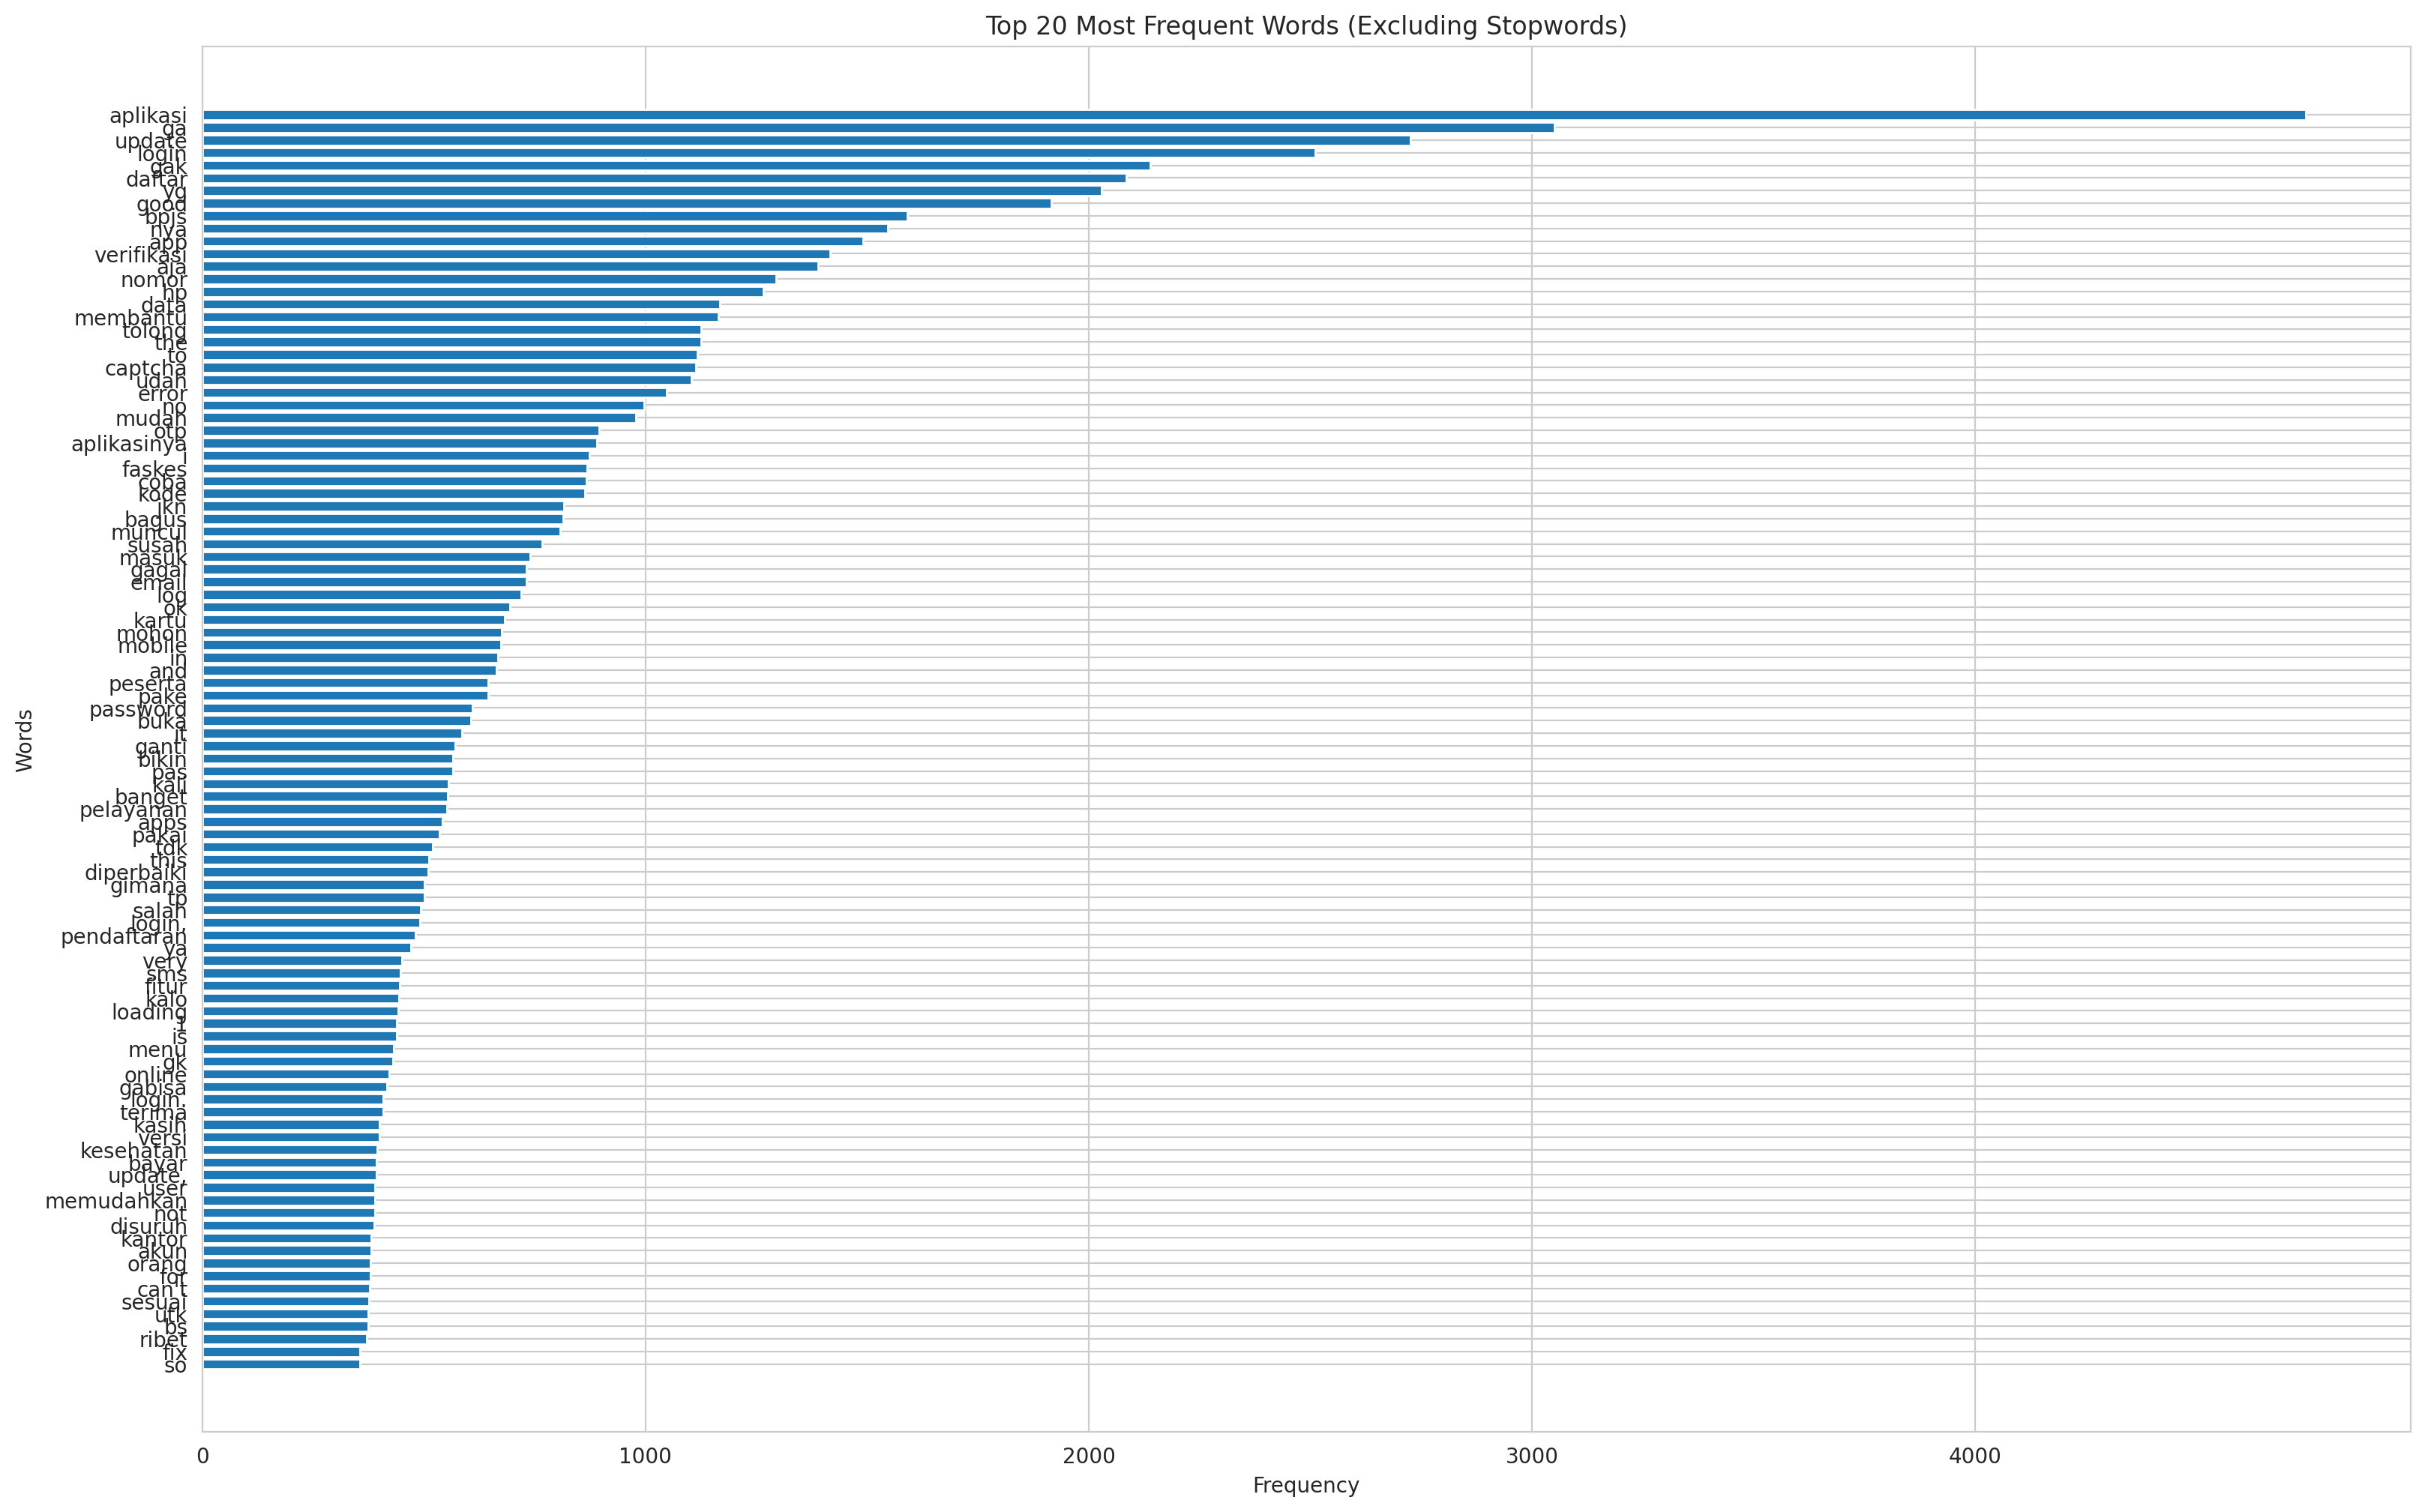

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_jknrev[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [ ]:
common_words

[('aplikasi', 4745),
 ('ga', 3050),
 ('update', 2726),
 ('login', 2511),
 ('gak', 2139),
 ('daftar', 2085),
 ('yg', 2029),
 ('good', 1915),
 ('bpjs', 1591),
 ('nya', 1547),
 ('app', 1491),
 ('verifikasi', 1416),
 ('aja', 1389),
 ('nomor', 1295),
 ('hp', 1266),
 ('data', 1168),
 ('membantu', 1164),
 ('tolong', 1126),
 ('the', 1125),
 ('to', 1117),
 ('captcha', 1114),
 ('udah', 1103),
 ('error', 1048),
 ('no', 997),
 ('mudah', 978),
 ('otp', 895),
 ('aplikasinya', 890),
 ('i', 873),
 ('faskes', 869),
 ('coba', 866),
 ('kode', 863),
 ('jkn', 816),
 ('bagus', 814),
 ('muncul', 807),
 ('susah', 766),
 ('masuk', 740),
 ('gagal', 732),
 ('email', 731),
 ('log', 719),
 ('ok', 694),
 ('kartu', 682),
 ('mohon', 676),
 ('mobile', 673),
 ('in', 667),
 ('and', 664),
 ('peserta', 645),
 ('pake', 645),
 ('password', 610),
 ('buka', 606),
 ('it', 585),
 ('ganti', 571),
 ('bikin', 566),
 ('pas', 566),
 ('kali', 556),
 ('banget', 553),
 ('pelayanan', 552),
 ('apps', 542),
 ('pakai', 535),
 ('tdk', 520),